In [1]:
import seaborn as sns
from isrobust_TFG.utils import get_resource_path
import pandas as pd

2024-12-28 14:11:41.270923: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x = pd.read_csv(get_resource_path("pbk_circuit_hsa_sig.tar.xz"), index_col="symbol")
x = x.loc[:, x.sum() > 0]
x.head()

,P-hsa03320-62,P-hsa03320-45,P-hsa03320-43,P-hsa03320-23,P-hsa03320-32,P-hsa03320-8,P-hsa03320-7,P-hsa03320-9,P-hsa03320-39,P-hsa03320-38,...,P-hsa05164-34,P-hsa05164-35,P-hsa05164-36,P-hsa05164-41 42,P-hsa05164-47,P-hsa05164-53,P-hsa05164-68,P-hsa05164-77,P-hsa05164-78,P-hsa05164-90
symbol,,,,,,,,,,,,,,,,,,,,,
akt3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tank,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
foxo6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kir2ds2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cldn24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
z = (x>0).sum(axis=0)
z.name = "# genes"
z = z.reset_index()
z["Entidad"] = "Circuitos"
z = z.drop("index", axis=1)
z["Base"] = "KEGG"
z

,# genes,Entidad,Base
0,5,Circuitos,KEGG
1,5,Circuitos,KEGG
2,5,Circuitos,KEGG
3,5,Circuitos,KEGG
4,5,Circuitos,KEGG
...,...,...,...
1219,5,Circuitos,KEGG
1220,1,Circuitos,KEGG
1221,4,Circuitos,KEGG
1222,3,Circuitos,KEGG


In [4]:
p = x.reset_index().melt(id_vars=["symbol"], var_name="Pathways", value_name="# genes")
p["Pathways"] = p["Pathways"].str.split("-").str[1]
p = p.loc[p["# genes"] > 0]
p = p.groupby("Pathways")["symbol"].agg("nunique")
p.name = "# genes"
p = p.reset_index()
p["Base"] = "KEGG"
p["Entidad"] = "Pathways"
p = p.drop("Pathways", axis=1)
p

,# genes,Base,Entidad
0,62,KEGG,Pathways
1,252,KEGG,Pathways
2,87,KEGG,Pathways
3,224,KEGG,Pathways
4,207,KEGG,Pathways
...,...,...,...
89,34,KEGG,Pathways
90,18,KEGG,Pathways
91,29,KEGG,Pathways
92,57,KEGG,Pathways


In [5]:
from isrobust_TFG.bio import get_reactome_adj

In [6]:
r = get_reactome_adj()
r = (r>0).sum(axis=0)
r.name = "# genes"
r = r.reset_index()
r["Entidad"] = "Pathways"
r = r.drop("geneset", axis=1)
r["Base"] = "Reactome"
r.head()

,# genes,Entidad,Base
0,7,Pathways,Reactome
1,5,Pathways,Reactome
2,5,Pathways,Reactome
3,10,Pathways,Reactome
4,103,Pathways,Reactome


In [7]:
k =pd.concat((r, p, z), axis=0, ignore_index=True)
k.head()

,# genes,Entidad,Base
0,7,Pathways,Reactome
1,5,Pathways,Reactome
2,5,Pathways,Reactome
3,10,Pathways,Reactome
4,103,Pathways,Reactome


In [8]:
(k.groupby(["Base", "Entidad"])["# genes"]
 .describe() 
 .to_latex(
   "databases.tex",
    bold_rows=True,
    escape=True,
    float_format="%.2f"
))

In [9]:
(k.groupby(["Base", "Entidad"])["# genes"]
 .describe() )

count       mean         std   min    25%   50%    75%  \
Base     Entidad                                                              
KEGG     Circuitos  1224.0  39.428922   50.250654   1.0  10.00  21.0   50.0   
         Pathways     94.0  99.021277   63.679807  18.0  59.25  86.0  123.0   
Reactome Pathways   1615.0  55.403096  108.250663   5.0  11.00  23.0   57.0   

                       max  
Base     Entidad            
KEGG     Circuitos   401.0  
         Pathways    411.0  
Reactome Pathways   1434.0

In [10]:
ktoplot = k.copy()
ktoplot["Entidad"] = ktoplot["Base"] + " " + ktoplot["Entidad"]
ktoplot["Métrica"] = "# genes"
ktoplot = ktoplot.rename(columns={"# genes": "Valor"})
ktoplot = ktoplot.loc[ktoplot["Valor"] < 400, :]

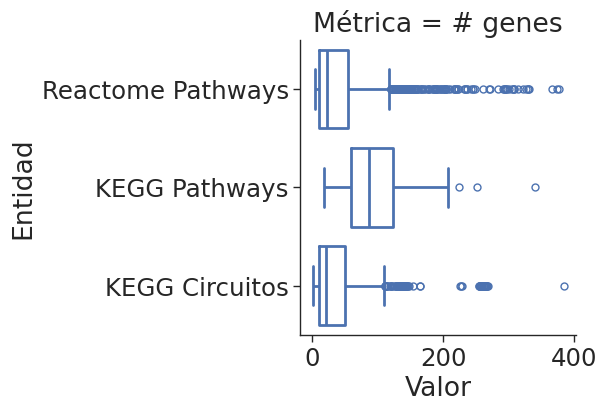

In [11]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context="paper", font_scale=2, style="ticks", rc=custom_params)
fac = 0.5

g = sns.catplot(
    data=ktoplot,
    kind="box",
    col="Métrica",
    height=9 * fac,
    aspect=16 / 9 * fac,
    sharey=True,
    sharex=False,
    y="Entidad",
    x="Valor",
    # split=False,
    # cut=0,
    fill=False,
    # density_norm="count",
    # inner="quart",
    linewidth=2,
    legend=False,
    legend_out=False,
    col_wrap=4
)

g.savefig("databases.pdf")